# PyISS v0.3 — Feature Tour

> **What is PyISS?** A Python toolkit for exploring Cassini ISS imagery via the [OPUS API](https://opus.pds-rings.seti.org). Given any single observation ID, PyISS automatically infers the surrounding observation *set*, lets you slice/filter/select individual images, display them visually, and perform calibrated image arithmetic (e.g. filter ratios).

This notebook walks through **every user-facing feature** of v0.3, organised into five sections:

| # | Section | What you'll learn |
|---|---------|-------------------|
| 1 | **Setup & Set Inference** | Install, import, and create your first `ISSSet` |
| 2 | **Inspecting a Set** | Properties: size, filters, time window, DataFrame |
| 3 | **Selecting Observations** | All the ways to pick exactly one image |
| 4 | **Display & Visualisation** | `show()` chains: layout, size, calibration, intensity |
| 5 | **Scientific Arithmetic** | Pairing, dividing, and visualising ratio images |

---

## 1 · Setup & Set Inference

### Installation

If you installed PyISS from GitHub, uncomment and run the pip-install cell below.  
If you're developing locally, the next cell adds the local `src/` to `sys.path` instead.

In [20]:
# Uncomment the line below to install from GitHub:
# %pip install "pyiss @ git+https://github.com/ArnaudMath/pyiss.git"

In [21]:
# Local development path (skip this cell if you pip-installed pyiss)
import sys
from pathlib import Path

root = Path("..").resolve()
sys.path.insert(0, str(root / "src"))

### Infer a set from a single OPUS ID

`infer_set()` is the main entry point. Pass **any valid Cassini ISS OPUS ID** and PyISS will query OPUS, detect the surrounding observation cadence, and return an `ISSSet` — a lightweight wrapper around the inferred group of images.

In [22]:
import pyiss as iss

# Pick any valid ISS OPUS ID as your seed observation
set0 = iss.infer_set("co-iss-w1540365932")
set0

---

## 2 · Inspecting a Set

Every `ISSSet` exposes read-only **properties** that summarise what's inside.

| Property | Type | Description |
|----------|------|-------------|
| `size` | `int` | Total number of observations |
| `available_filters` | `list[str]` | Filter names in order of first appearance |
| `filter_counts` | `dict[str, int]` | Per-filter observation counts |
| `time_window` | `TimeWindow` | Start / end timestamps |
| `time_window.duration_s` | `float` | Window span in seconds |
| `df` | `DataFrame` | Core columns: `opusid`, `time1`, `target`, `COISSfilter` |
| `selected_image_type` | `str` | Current image type (default `"IMG"`) |

In [23]:
# Basic properties at a glance
print("size:             ", set0.size)
print("available_filters:", set0.available_filters)
print("filter_counts:    ", set0.filter_counts)
print("time_window:      ", set0.time_window)
print("duration (s):     ", set0.time_window.duration_s)
print("image_type:       ", set0.selected_image_type)

size:              22
available_filters: ['IR1', 'CB3', 'MT3', 'MT3+IRP90', 'MT3+IRP0', 'CB2', 'CB2+IRP90', 'CB2+IRP0', 'MT2', 'MT2+IRP90', 'MT2+IRP0', 'CLEAR']
filter_counts:     {'IR1': 6, 'CB3': 6, 'MT3': 1, 'MT3+IRP90': 1, 'MT3+IRP0': 1, 'CB2': 1, 'CB2+IRP90': 1, 'CB2+IRP0': 1, 'MT2': 1, 'MT2+IRP90': 1, 'MT2+IRP0': 1, 'CLEAR': 1}
time_window:       TimeWindow(start=Timestamp('2006-10-24 06:48:45.323000+0000', tz='UTC'), end=Timestamp('2006-10-24 07:04:18.388000+0000', tz='UTC'))
duration (s):      933.065
image_type:        IMG


In [24]:
# The canonical DataFrame — clean view of the set
set0.df

,opusid,time1,target,COISSfilter
0,co-iss-w1540365650,2006-10-24 06:48:45.323000+00:00,Titan,IR1
1,co-iss-w1540365683,2006-10-24 06:49:18.331000+00:00,Titan,IR1
2,co-iss-w1540365716,2006-10-24 06:49:51.331000+00:00,Titan,IR1
3,co-iss-w1540365772,2006-10-24 06:50:29.374000+00:00,Titan,CB3
4,co-iss-w1540365828,2006-10-24 06:51:25.374000+00:00,Titan,CB3
5,co-iss-w1540365884,2006-10-24 06:52:21.373000+00:00,Titan,CB3
6,co-iss-w1540365932,2006-10-24 06:53:17.377000+00:00,Titan,MT3
7,co-iss-w1540365980,2006-10-24 06:54:03.377000+00:00,Titan,MT3+IRP90
8,co-iss-w1540366068,2006-10-24 06:55:05.380000+00:00,Titan,MT3+IRP0
9,co-iss-w1540366101,2006-10-24 06:56:15.828000+00:00,Titan,CB2


### Generic metadata access

`metadata()` fetches **any** OPUS field, even ones not stored locally. Unknown fields return empty values with a warning.

In [25]:
# Retrieve arbitrary OPUS fields for a filtered sub-set
set0.filter("IR1").metadata("opusid", "time1", "target")

,opusid,time1,target
0,co-iss-w1540365650,2006-10-24 06:48:45.323000+00:00,Titan
1,co-iss-w1540365683,2006-10-24 06:49:18.331000+00:00,Titan
2,co-iss-w1540365716,2006-10-24 06:49:51.331000+00:00,Titan
3,co-iss-w1540366316,2006-10-24 06:59:51.358000+00:00,Titan
4,co-iss-w1540366349,2006-10-24 07:00:24.358000+00:00,Titan
5,co-iss-w1540366382,2006-10-24 07:00:57.358000+00:00,Titan


### Diagnostic window

`diagnostic_window()` shows the set rows flanked by the nearest neighbour **before** (row A) and **after** (row Z). This makes boundary gaps explicit.

In [26]:
set0.diagnostic_window()

,_role,opusid,time1,target,COISSfilter,dt_prev_s,dt_next_s
0,A,co-iss-n1540316776,2006-10-23 17:12:49.749000+00:00,Titan,MT3+IRP0,NaN,48955.574
1,set,co-iss-w1540365650,2006-10-24 06:48:45.323000+00:00,Titan,IR1,48955.574,33.008
2,set,co-iss-w1540365683,2006-10-24 06:49:18.331000+00:00,Titan,IR1,33.008,33.000
3,set,co-iss-w1540365716,2006-10-24 06:49:51.331000+00:00,Titan,IR1,33.000,38.043
4,set,co-iss-w1540365772,2006-10-24 06:50:29.374000+00:00,Titan,CB3,38.043,56.000
5,set,co-iss-w1540365828,2006-10-24 06:51:25.374000+00:00,Titan,CB3,56.000,55.999
6,set,co-iss-w1540365884,2006-10-24 06:52:21.373000+00:00,Titan,CB3,55.999,56.004
7,set,co-iss-w1540365932,2006-10-24 06:53:17.377000+00:00,Titan,MT3,56.004,46.000
8,set,co-iss-w1540365980,2006-10-24 06:54:03.377000+00:00,Titan,MT3+IRP90,46.000,62.003
9,set,co-iss-w1540366068,2006-10-24 06:55:05.380000+00:00,Titan,MT3+IRP0,62.003,70.448


---

## 3 · Selecting Observations

`select()` always resolves to **exactly one** observation (or raises). There are four modes:

| Mode | Call | When to use |
|------|------|-------------|
| **By index** | `select("IR1", which=0)` | You know the position inside that filter |
| **Nearest to seed** | `select("IR1", nearest="seed")` | Closest to the original seed observation |
| **Nearest to time** | `select("IR1", nearest="time", t="...")` | Closest to an arbitrary timestamp |
| **By OPUS ID** | `select(opusid="co-iss-...")` | You know the exact observation ID |

### `filter()` vs `select()`

- **`filter()`** returns a *new sub-set* (potentially many rows).
- **`select()`** always returns a *single-row* `ISSSet`.

In [27]:
# --- select by index ---
obs_idx = set0.select("IR1", which=0)
print("By index (which=0):")
print(obs_idx.df)
print()

By index (which=0):
               opusid                            time1 target COISSfilter
0  co-iss-w1540365650 2006-10-24 06:48:45.323000+00:00  Titan         IR1



In [28]:
# --- select nearest to seed ---
obs_seed = set0.select("IR1", nearest="seed")
print("Nearest to seed:")
print(obs_seed.df)
print()

Nearest to seed:
               opusid                            time1 target COISSfilter
0  co-iss-w1540365716 2006-10-24 06:49:51.331000+00:00  Titan         IR1



In [29]:
# --- select nearest to a specific time ---
obs_time = set0.select("IR1", nearest="time", t="2006-10-24T06:53:00Z")
print("Nearest to given time:")
print(obs_time.df)
print()

Nearest to given time:
               opusid                            time1 target COISSfilter
0  co-iss-w1540365716 2006-10-24 06:49:51.331000+00:00  Titan         IR1



In [30]:
# --- select by exact OPUS ID ---
known_id = obs_idx.df.iloc[0]["opusid"]
obs_id = set0.select(opusid=known_id)
print(f"By opusid ('{known_id}'):")
print(obs_id.df)

By opusid ('co-iss-w1540365650'):
               opusid                            time1 target COISSfilter
0  co-iss-w1540365650 2006-10-24 06:48:45.323000+00:00  Titan         IR1


In [31]:
# --- filter() returns a multi-row sub-set (not a single observation) ---
sub = set0.filter("IR1")
print(f"filter('IR1') → {sub.size} rows")
print(sub.df)
print()

# You can also pass multiple filters at once
sub2 = set0.filter("IR1", "CLEAR")
print(f"filter('IR1', 'CLEAR') → {sub2.size} rows")

filter('IR1') → 6 rows
               opusid                            time1 target COISSfilter
0  co-iss-w1540365650 2006-10-24 06:48:45.323000+00:00  Titan         IR1
1  co-iss-w1540365683 2006-10-24 06:49:18.331000+00:00  Titan         IR1
2  co-iss-w1540365716 2006-10-24 06:49:51.331000+00:00  Titan         IR1
3  co-iss-w1540366316 2006-10-24 06:59:51.358000+00:00  Titan         IR1
4  co-iss-w1540366349 2006-10-24 07:00:24.358000+00:00  Titan         IR1
5  co-iss-w1540366382 2006-10-24 07:00:57.358000+00:00  Titan         IR1

filter('IR1', 'CLEAR') → 7 rows


---

## 4 · Display & Visualisation

`show()` returns a **chainable display builder** (`ISSSetDisplay`). Chain options to configure the preview, then let the notebook auto-render (or call `.render()` explicitly).

### Chaining options

| Method | Values | Default | Description |
|--------|--------|---------|-------------|
| `.image_size(s)` | `"thumb"`, `"small"`, `"medium"`, `"full"` | `"full"` | Preview resolution |
| `.image_calibrated(b)` | `True` / `False` | `False` | Use calibrated previews |
| `.intensity(s)` | `"DN"`, `"I/F"`, `"RADIANCE"` | `"DN"` | Intensity mapping (non-DN requires calibrated) |
| `.layout(s)` | `"grid"`, `"row"` | `"grid"` | Arrangement |

### Passing filters to `show()`

You can pass zero or more filter names directly:
- `set0.show()` → all images in the set
- `set0.show("IR1")` → only IR1 images
- `set0.show("CLEAR", "IR1", "RED")` → multiple filters side-by-side

In [32]:
# Multiple filters side-by-side in a horizontal row, at medium resolution
set0.show("CLEAR", "IR1", "IR3", "RED", "BL1", layout="row").image_size("medium").render()

In [33]:
# Showing a single observation with calibrated I/F intensity
obs_ir1 = set0.select("IR1", which=0)
obs_ir1.show().image_calibrated(True).intensity("I/F").render()

In [34]:
# Grid layout (default) at full resolution — all observations
set0.show().render()

---

## 5 · Scientific Arithmetic (v0.3)

PyISS v0.3 introduces **calibrated image arithmetic** — the ability to divide one filter image by another to produce ratio maps.

### Workflow

```
set0                                     ← your inferred set
  │
  ├─ .image_type("CAL")                  ← switch to calibrated product type
  │     │
  │     ├─ .select("IR1", which=0)       ← pick one observation (left operand)
  │     ├─ .select("CLEAR", nearest=…)   ← pick one observation (right operand)
  │     │
  │     └─ .pair(obs_a, obs_b, ...)      ← build a strict pair
  │           │
  │           └─ .divide()               ← compute ratio array(s)
  │                 │
  │                 ├─ .summary()         ← statistics table
  │                 └─ .show()            ← contrast-stretched visualisation
```

### Key rules
- **`image_type("CAL")`** is required before `pair()` → `divide()` (no raw arithmetic on uncalibrated data).
- **`pair()`** accepts either filter *names* (`str`) or pre-selected single-row `ISSSet` objects.
- **`divide()`** rejects shape mismatches and uses `epsilon` to avoid division by zero.
- **`max_dt_s`** (optional) rejects pairs whose temporal mismatch exceeds a threshold.

### Step 1 — Switch to calibrated images and select observations

In [35]:
# Switch the set to calibrated image type
set_cal = set0.image_type("CAL")
print("image_type:", set_cal.selected_image_type)

# Select the two observations we want to divide
obs_a = set_cal.select("IR1", which=0)      # numerator
obs_b = set_cal.select("CLEAR", nearest="seed")  # denominator

print(f"\nLeft  (A): {obs_a.df.iloc[0]['opusid']}  filter={obs_a.df.iloc[0]['COISSfilter']}")
print(f"Right (B): {obs_b.df.iloc[0]['opusid']}  filter={obs_b.df.iloc[0]['COISSfilter']}")

image_type: CAL

Left  (A): co-iss-w1540365650  filter=IR1
Right (B): co-iss-w1540366583  filter=CLEAR


### Step 2 — Build a pair

`pair()` performs strict temporal matching and bundles both images with their download settings.

In [36]:
# Build a strict pair for arithmetic
pair = set_cal.pair(
    obs_a,
    obs_b,
    image_size="full",            # download full-resolution previews
    image_calibrated=True,        # use calibrated previews
    intensity="DN",               # intensity mode
)

# The pair DataFrame shows both operands, their times, and the temporal gap
pair.df

,left_opusid,right_opusid,left_time1,right_time1,target,left_filter,right_filter,dt_s
0,co-iss-w1540365650,co-iss-w1540366583,2006-10-24 06:48:45.323000+00:00,2006-10-24 07:04:18.388000+00:00,Titan,IR1,CLEAR,933.065


### Step 3 — Divide and inspect

`divide()` downloads both images, divides pixel-by-pixel, and returns an `ISSRatio` object.

In [37]:
# Compute the ratio image (left ÷ right)
ratio = pair.divide()

# Numerical summary: min, max, mean of the finite ratio values
ratio.summary()

,index,filter_a,filter_b,ratio_min,ratio_max,ratio_mean
0,0,IR1,CLEAR,0.0,97.0,0.967179



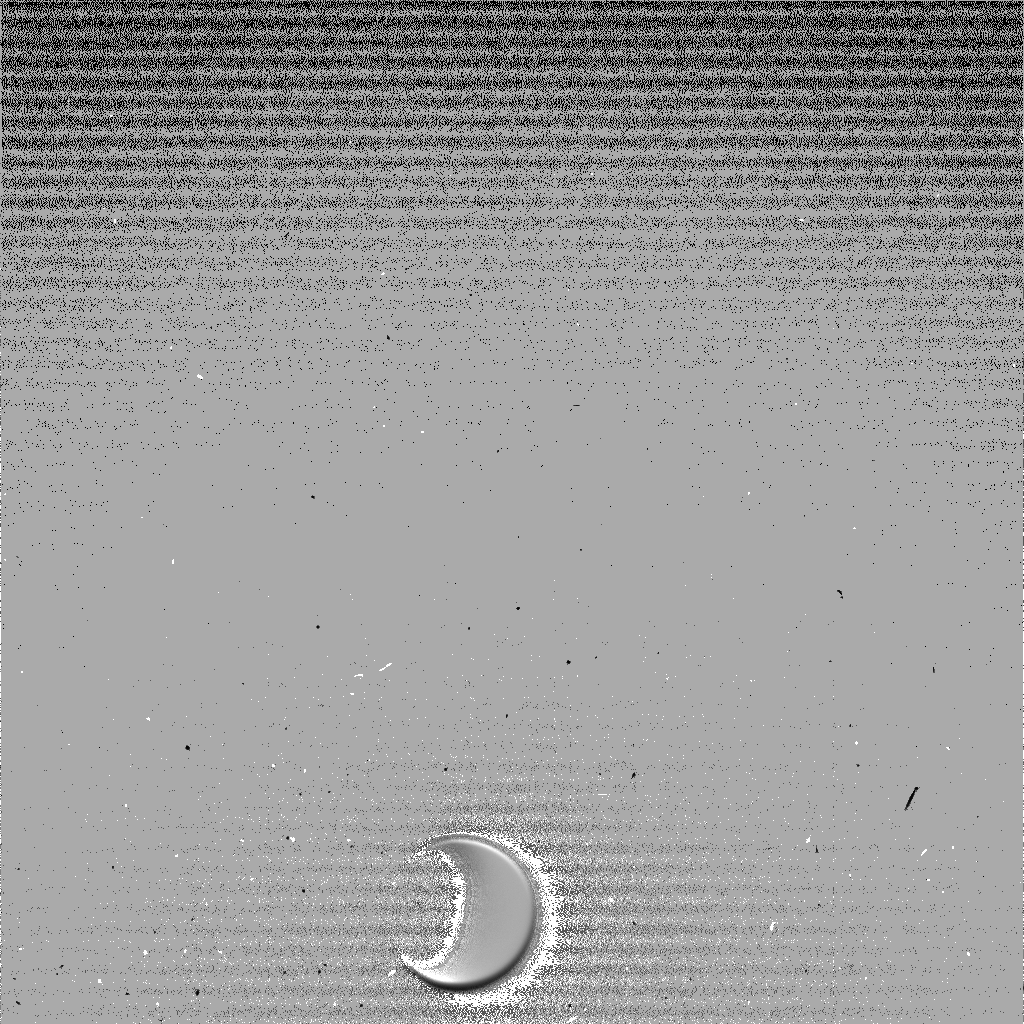

In [38]:
# Visualise the ratio image (contrast-stretched grayscale)
# You can adjust clip_percentiles to change the contrast stretch
ratio.show(index=0, clip_percentiles=(1.0, 99.0))

---

## Quick Reference

### `ISSSet` — properties

| Property | Returns |
|----------|---------|
| `.size` | `int` — number of observations |
| `.df` | `DataFrame` — core columns (`opusid`, `time1`, `target`, `COISSfilter`) |
| `.available_filters` | `list[str]` — filter names in time order |
| `.filter_counts` | `dict[str, int]` — per-filter counts |
| `.time_window` | `TimeWindow` — `.start`, `.end`, `.duration_s` |
| `.selected_image_type` | `str` — current image type (`IMG`, `CAL`, `CUB`) |

### `ISSSet` — methods

| Method | Returns | Description |
|--------|---------|-------------|
| `.filter(*names)` | `ISSSet` | Slice to one or more filter names |
| `.select(filter, which=, nearest=, t=, opusid=)` | `ISSSet` (1 row) | Resolve a single observation |
| `.image_type(t)` | `ISSSet` | Set downstream image type |
| `.show(*filters, layout=)` | `ISSSetDisplay` | Start a display chain |
| `.pair(a, b, ...)` | `ISSPair` | Build a strict pair for arithmetic |
| `.metadata(*fields)` | `DataFrame` | Fetch arbitrary OPUS fields |
| `.diagnostic_window()` | `DataFrame` | Set rows + boundary neighbours |

### `ISSSetDisplay` — chainable

| Method | Description |
|--------|-------------|
| `.image_size(s)` | `"thumb"`, `"small"`, `"medium"`, `"full"` |
| `.image_calibrated(b)` | `True` / `False` |
| `.intensity(s)` | `"DN"`, `"I/F"`, `"RADIANCE"` |
| `.layout(s)` | `"grid"`, `"row"` |
| `.render()` | Force display (auto in notebooks) |

### `ISSPair` → `ISSRatio`

| Method | Returns | Description |
|--------|---------|-------------|
| `pair.df` | `DataFrame` | Paired operand details |
| `pair.divide(epsilon=)` | `ISSRatio` | Pixel-wise division |
| `ratio.summary()` | `DataFrame` | Min/max/mean of finite ratios |
| `ratio.show(index=, clip_percentiles=)` | — | Contrast-stretched grayscale PNG |
| `ratio.count` | `int` | Number of ratio images |
| `ratio.df` | `DataFrame` | Pair metadata |